In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [53]:
#create a class that inherits nn.Module

class Model(nn.Module):
    #inputlayer(4 features of iris flowers) --> H1 (n no. of neurons) --> H2 (n) --> output (3 classes of iris flowers)
    def __init__(self, in_features = 4, h1 = 9, h2 = 9, out_features = 3):
        super().__init__() #instantiate our nn.module
        #h1 and h2 can be arbitrary, more explanation later
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        #'fc' stands for 'fully connected'

    #function to move forward in the defined neural network
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = (self.out(x))
    #push x in the first layer, then the second, and then the output
        return x

In [54]:
torch.manual_seed(41) #pick a manual seed for randomization
model = Model() #create an instance of a model

In [55]:
import pandas as pd #to work with the data
import matplotlib.pyplot as plt #to graph our results
%matplotlib inline

In [56]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url) #pass the url into the read_csv function, so that it can be loaded in our dataframe

In [57]:
my_df.head

<bound method NDFrame.head of      sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]>

In [58]:
#replace the 3 color variables with numbers since they are more useful for machine learning
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 2)
my_df

C:\Users\Anuraag (University)\AppData\Local\Temp\ipykernel_21604\2964610859.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [59]:
# train test and split

x = my_df.drop('variety', axis = 1) #'variety' is the output we want, the remaining columns are the variables we are observing
# 'axis = 1' because it is a column
y = my_df['variety']
x

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [60]:
#we want to convert x and y to numpy arrays
import numpy as np
X = x.values
Y = y.values
X #now, X will just be a big numpy array

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [61]:
from sklearn.model_selection import train_test_split #necessary import
#Now let's run the train, test split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.2, random_state = 41) #test size is 20% of the dataset, 80% will be used to train


In [62]:
#Convert the X features to float tensors
X_train = torch.FloatTensor(X_train) #values in the variables in X are floats
X_test = torch.FloatTensor(X_test) #values in the variables in X are floats

#convert the Y features to long tensors (long are 64 bit integers)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [63]:
#set the criterion of the model to measure the error, i.e., how far off the predictions are
criterion = nn.CrossEntropyLoss()

#choose Adam optimizer, lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
#the lower your learning rate is, the longer it takes to train the model
#model parameters are fc1, fc2 and the output layer

In [64]:
#train our model
#Epochs - one run through all the training data in our network
epochs = 200
losses = [] #create a python list to store our losses or errors
for i in range (epochs):
    #go forward and get the predictions
    Y_pred = model.forward(X_train) #pass in the training variables in the forward function

    #measure the loss/error, will be high at first
    loss = criterion(Y_pred, Y_train)

    #keep track of our losses
    losses.append(loss.detach().numpy()) #losses will be tensors, turn them back to numpy values for graphing eventually

    #print every 10 epochs
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')

    #do back propagation, i.e.l,
    #feed back the error into the network so that it tweaks its weights accordingly and learns better
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #these three above are the necessary functions for back-propagation


Epoch: 0 and loss: 1.1246787309646606
Epoch: 10 and loss: 0.9471866488456726
Epoch: 20 and loss: 0.6981046795845032
Epoch: 30 and loss: 0.46052101254463196
Epoch: 40 and loss: 0.304770827293396
Epoch: 50 and loss: 0.18156270682811737
Epoch: 60 and loss: 0.10760859400033951
Epoch: 70 and loss: 0.07261586934328079
Epoch: 80 and loss: 0.05558817461133003
Epoch: 90 and loss: 0.04619280993938446
Epoch: 100 and loss: 0.04028429463505745
Epoch: 110 and loss: 0.03614598885178566
Epoch: 120 and loss: 0.033022571355104446
Epoch: 130 and loss: 0.03054494969546795
Epoch: 140 and loss: 0.028510192409157753
Epoch: 150 and loss: 0.026796134188771248
Epoch: 160 and loss: 0.025322923436760902
Epoch: 170 and loss: 0.024035697802901268
Epoch: 180 and loss: 0.022895457223057747
Epoch: 190 and loss: 0.02187376655638218


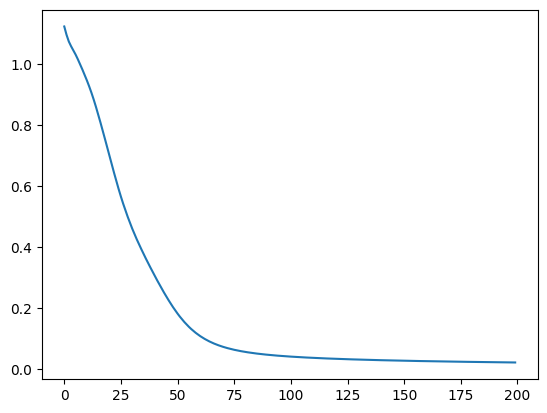

In [65]:
#Graph it out!

plt.plot(range(epochs), losses)
plt.ylabel = ('loss/error')
plt.xlabel = ('Epochs')

*changing Epochs or the learning rate actually affects the graph and shows us how fast our model learns, and how many epochs it requires based on where the graph starts to flatten out, showing insignificant change in the losses*